<h4> 1. Methodology Description </h4>

In this script, I used a factor augmented vector autoregression (FAVAR) model to forecast copper price. FAVAR was first developed by Bernanke, Boivin and Eliasz (2004) to estimate the impact of monetary policy. Vanguard later applied this model to create the Vanguard Capital Market Model to forecast asset prices. Plese refer to https://www.nber.org/system/files/working_papers/w10220/w10220.pdf for detailed explaination of the model.

The mechanism is simple: the math behind FAVAR and classic VAR are the same. But unlike VAR, which can only take  a few variables, FAVAR can incorporate a very large data set and reduce them to a few factors using principal component analysis.

Principal component analysis is an algorithm that finds a few common factors that can explain the most variation in the underlying data. It is like taking a two-dimensional photo for a three-dimentinal person. We can take the photo from many angles. Some angles can clearly identify the person, e.g. the front anglge, and others lose a lot of critical information, e.g. the back angle. Principal component analysis is an algorithm that finds the best shooting angle when we take a x-dimentional photo for a N-dimentional data set (x<<N). 

Then, we combine variables of interest, which in our case is the copper price, and the common factors to run the classical VAR regression. With this framework, we can include as many variables as possible and can even expand the model to a big data setting.

The model also allows us to impose restrictions on the factors. Some economic indicators move synchronously with copper price, others lead or lag copper price movement. To implement this identification scheme, it is useful to define two categories of variables, “slow-moving” and “fast-moving”. A “slow-moving” variable is one that is largely predetermined as of the current period, while a “fast-moving” variable – think of an asset price – is highly sensitive to contemporaneous economic news or shocks.

Please refer to the FactorAugmentedVAR.py for more details on model execution.

In [1]:
from FactorAugmentedVAR import *
from Functions import *
from datetime import *
import warnings
warnings.filterwarnings('ignore')

<h4> 2. Data Description </h4>

The four largest metal consumers are US, China, Germany and Japan. Therefore, I included some of the most important economic indicators of these four companies in the data set.

I took out the data of January and February of China because of the Spring Festical anomaly and use interpolations instead. This is a common practice when studying China's economic indicators because the Spring Festival can be either in Januray or February.

Missing data are all replaced with interpolation. Alternatively, we can also use Kalman Filter to estimate the missing data. I included a KalmanFilter.py in the files. For simplicity, I didn't use Kalman Filter for this exercise.

All data was transformed to make times series stationary.

In [3]:
"Data Import"
file_name='economic_data.xlsx'
sheet_name='transformed_vintage'
Temp = pd.read_excel(file_name, sheet_name, encoding = 'gb18030')
vintage_transformed = Temp.iloc[:,1:]
vintage_transformed.index = Temp.iloc[:,0]

"Data Interpolation"
vintage_intrpl = DataInterpolation(vintage_transformed[1:], 0, len(vintage_transformed.index), 'slinear').dropna(axis=0,how='any')

# vintage_intrpl

<h4> 3. Copper Price Prediction </h4>


<h4> Step 1: Calculate common factors </h4>
Common factors for all variables, i.e. copper price, fast moving variables and slow moving variables, are denoted by C. Common factors calculated from slow moving variables are denoted by F. The variable of interest, i.e. copper price, is denoted by Y.

In [4]:
"Factor Calculation"
factor = Factor(Y=pd.DataFrame(vintage_intrpl.iloc[:,0]), X_slow=vintage_intrpl.iloc[:,14:], n_factors=3, X_fast=vintage_intrpl.iloc[:,1:14])

#factor.C.plot()
#factor.F.plot()

<h4> Step 2: SVAR on F and Y </h4>
Run the classic structural vector autoregression on Y and F.

In [5]:
favar = FAVAR(Factor=factor.F, Y=pd.DataFrame(vintage_intrpl.iloc[:,0]), lag=3)
# favar.VAR.summary()

<h4> Step 3: Plot prediction </h4>

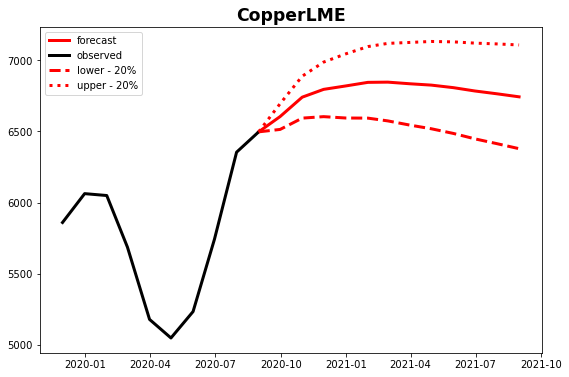

In [6]:
mean, low, up = favar.predict(Factor=factor.F[-5:], Y=pd.DataFrame(vintage_intrpl.iloc[-5:,0]), step=20)

favar.predict_plot(Factor=factor.F[-5:], Y=pd.DataFrame(vintage_intrpl.iloc[-10:,0]), step=12, freq='M', alpha=0.8, figure_size=[9,6],line_width=3.0,font_size='xx-large', actural='None')

From the char above, copper price should soon reach its cyclical peak and start to decrease.